In [1]:
import os
os.environ["KERAS_BACKEND"] = "torch" # alternatively you can use jax or tensorflow as the backend (see installation instructions in keras documentation)
import keras

import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split # helpful for splitting data into training and testing sets
from sklearn.preprocessing import StandardScaler, MinMaxScaler # helpful for scaling data to be between 0 and 1 or have a mean of 0 and standard deviation of 1


In [2]:
file_path = '/Users/ctychen/Desktop/N3AS/spectrum_data/'
#reloading data
parameters = np.concatenate([np.load(file_path + "atm_retr_params_12800_"+str(i)+".npy") for i in range(12)])
spectra_set = np.concatenate([np.load(file_path + "atm_retr_data_12800_"+str(i)+".npy") for i in range(12)])

#take the log of the spectra - seems like this helped a lot with feature identification
spectra_set = np.log(spectra_set)

parameters = parameters[~np.isnan(spectra_set).any(axis=1)]
spectra_set = spectra_set[~np.isnan(spectra_set).any(axis=1)]

print(parameters.shape)
print(spectra_set.shape)

n_samples = parameters.shape[0]
n_features = 947

max_log_flux = np.max(spectra_set, axis=1)
min_log_flux = np.min(spectra_set, axis=1)
spectra_set = (spectra_set - min_log_flux[:, np.newaxis])/(max_log_flux - min_log_flux)[:, np.newaxis]

(153590, 16)
(153590, 947)


In [38]:
#some test preprocessing...
#we have already normalized the log flux
#can we try subsampling the data to smooth them out? 

#subsample each spectrum - try keeping each 3rd point
subsampled_spectra_set = spectra_set[:, ::3]
wavelengths = np.linspace(0.95, 2.45, len(spectra_set[0]))
subsampled_wavelengths = wavelengths[::3]
print(subsampled_spectra_set.shape)

(153590, 316)


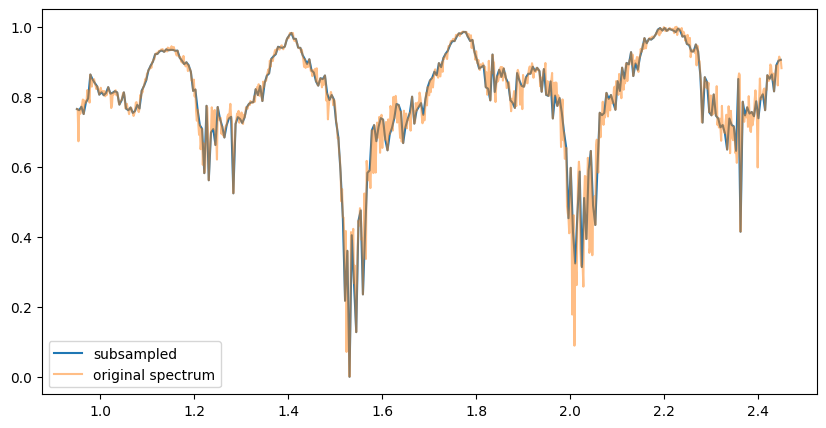

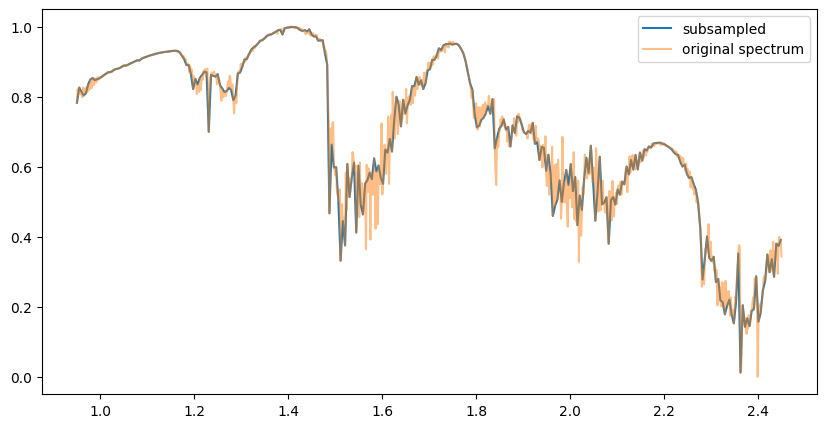

In [45]:
plt.figure(figsize=(10, 5))
plt.plot(subsampled_wavelengths, subsampled_spectra_set[1], label='subsampled')
plt.plot(wavelengths, spectra_set[1], label='original spectrum', alpha=0.5)
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(subsampled_wavelengths, subsampled_spectra_set[500], label='subsampled')
plt.plot(wavelengths, spectra_set[500], label='original spectrum', alpha=0.5)
plt.legend()
plt.show()

In [ ]:
#splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(parameters, spectra_set, test_size=0.2)